In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (7, 4)


### 8. This question involves the use of simple linear regression on the Auto data set. 


In [2]:
auto_df = pd.read_csv("data/Auto.csv")

#Tackle missing data
hp_notNA = auto_df["horsepower"] != "?"
hp_NA = auto_df["horsepower"] == "?"
mean = auto_df["horsepower"][hp_notNA].astype(float).mean()

hp_copy = auto_df.horsepower.copy()

hp_copy[hp_NA] = str(mean)
hp_copy = hp_copy.astype(float)

auto_df["horsepower"] = hp_copy
print(auto_df.dtypes)
auto_df.head()


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
auto_df.to_csv("data/Auto_v2.csv")

<AxesSubplot: xlabel='horsepower', ylabel='mpg'>

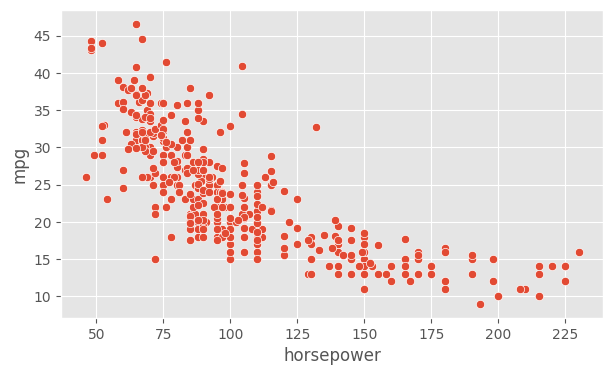

In [4]:
mpg = auto_df["mpg"]
hp = auto_df["horsepower"]

sns.scatterplot(x=hp, y=mpg)

We see that the trend data is clearly not linear, so we don't expect linear regression to perform well.

#### (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.

In [5]:
X_hp = sm.add_constant(hp)

linear_model = sm.OLS(mpg, exog=X_hp)
lm_res = linear_model.fit()
print(lm_res.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.45e-79
Time:                        15:06:41   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

#### Insights <br>
1. We see from the scatterplot that there is indeed a relationship betwee mpg and horsepower. We also see form the results summary that the t-statistic of the mpg variable is highly significant, further proving our observations.
2. From the coefficient of the OLS, an increase by 100 hp will result to a decrease of mpg of about 15.78.
3. The relationship between mpg and hp is negative.

#### (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

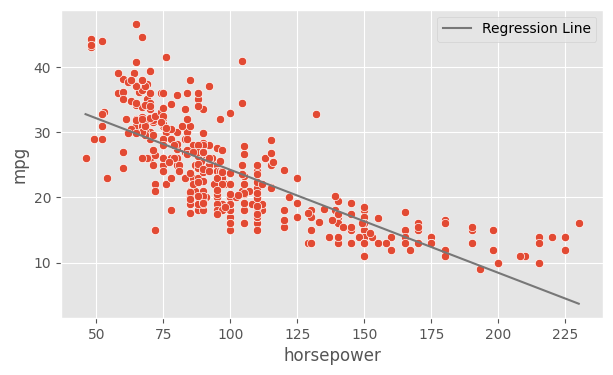

In [6]:
mpg_preds = lm_res.predict(X_hp)
sns.scatterplot(x=hp, y=mpg)
sns.lineplot(x=hp, y=mpg_preds, label="Regression Line", color="C3")

plt.legend()


#### (c) Use the plot() function to produce diagnostic plots of the leastsquares regression fit. Comment on any problems you see with the fit.

C:\Users\jamael\Documents\HandsOnML\venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


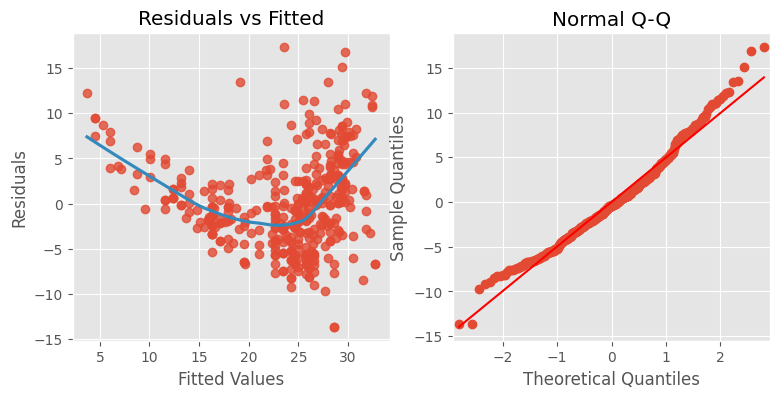

<Figure size 700x400 with 0 Axes>

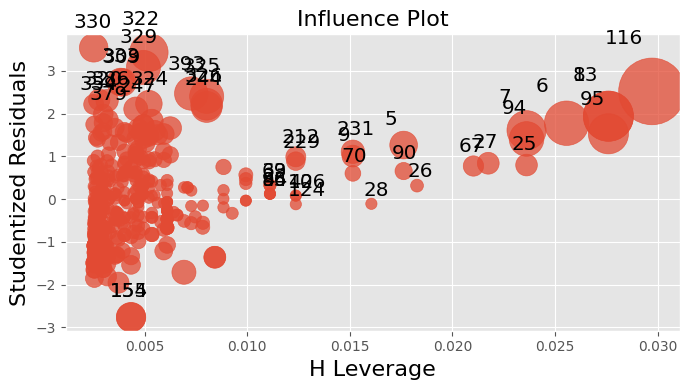

In [7]:
def resid_diag(y, y_pred, model):
    resids = y - y_pred
    rolling_resid = resids.rolling(23, center=True).mean()
    
    #Resids vs fitted
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    sns.regplot(x=y_pred, y=resids, ax=ax[0], lowess=True, line_kws={"color": "C1"})
    ax[0].set_title("Residuals vs Fitted")
    ax[0].set_ylabel("Residuals")
    ax[0].set_xlabel("Fitted Values")
    
    #Q-Q Plot
    sm.qqplot(resids, ax=ax[1], line="s", color="blue")
    ax[1].set_title("Normal Q-Q")
    
    ##
    fig = plt.figure(figsize=(7, 4))
    leverage_plot = sm.graphics.influence_plot(model)

    
    #Standardized residuals
    #Todo add Scale Location and Levarage
    
    plt.tight_layout() 
    plt.show()
    
resid_diag(mpg, mpg_preds, model=lm_res)

We definitely see a pattern in the residuals, which means that there is still information in the data that is not captured by the linear regression model.

### 9. This question involves the use of multiple linear regression on the Auto data set.

#### (a) Produce a scatterplot matrix which includes all of the variables in teh dataset.

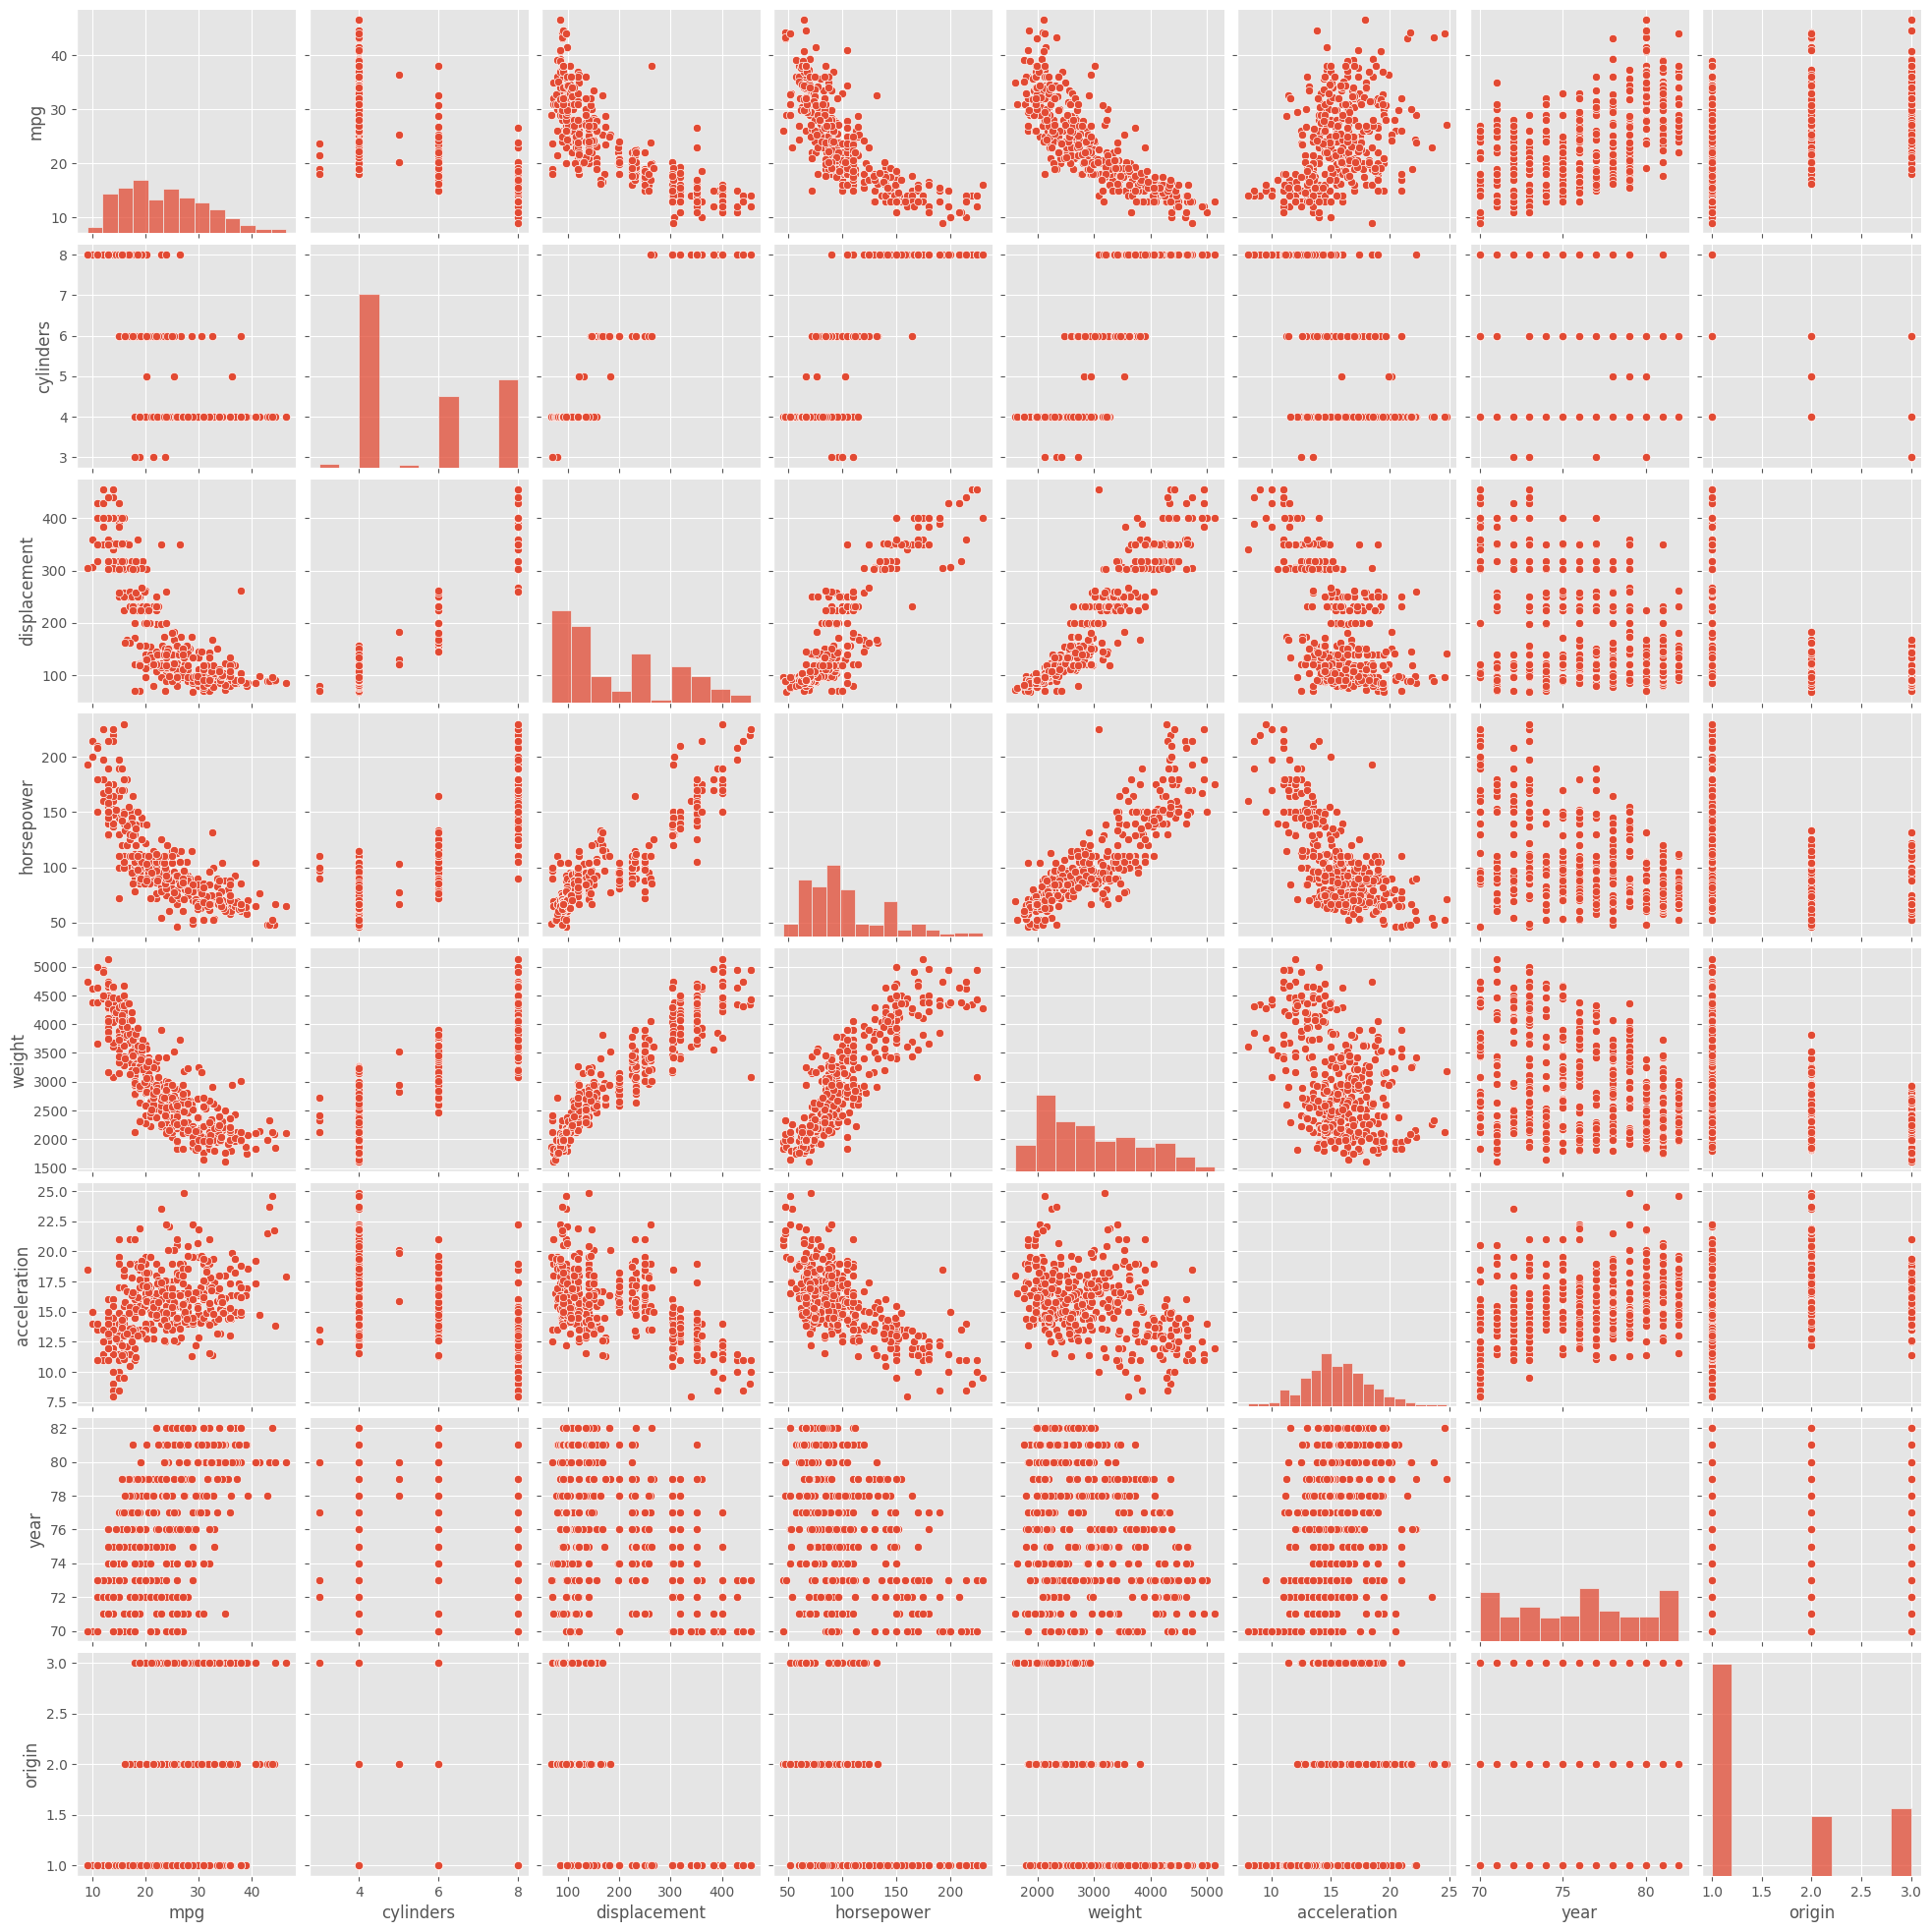

In [8]:
auto_dfq = auto_df[auto_df.columns[:-1]]
sns.pairplot(auto_dfq)

#### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable which is qualitative.

<AxesSubplot: >

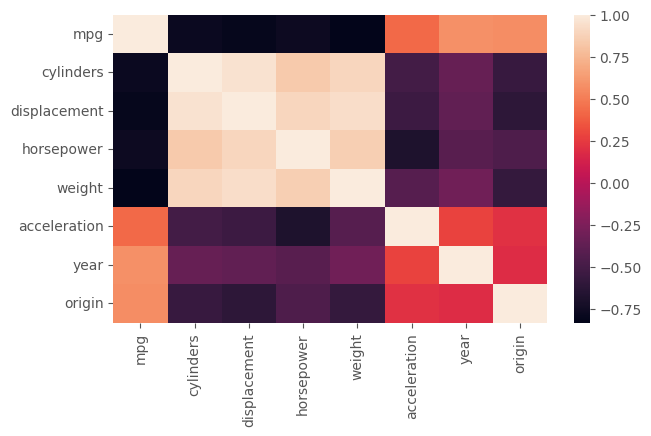

In [9]:
auto_corr = auto_dfq.corr()
sns.heatmap(auto_corr)

#### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

In [10]:
X_mlr = sm.add_constant(auto_dfq[auto_dfq.columns[1:]])

mlr_model = sm.OLS(mpg, X_mlr)

mlr_res = mlr_model.fit()
mlr_res.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          2.41e-141
Time:                        15:06:53   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* i. Is there a relationship between the predictors and the response.
  * **Yes since the F statistic is a large number, indicating that at least one of the predictors is related to the response**
* ii. Which predictors appear to have a statistically significant relationship to the response?
  * **Looking at the t-statistics the significant predictors are the displacement, weight, year, and origin**
* iii. What does the coefficient for the year suggest?.
  * **The year coef suggests that newer vehicles have higher mpg, and in one year, holding all other variables constant, the mpg increases by 0.7625**

#### (d) Comment on the residuals

<AxesSubplot: >

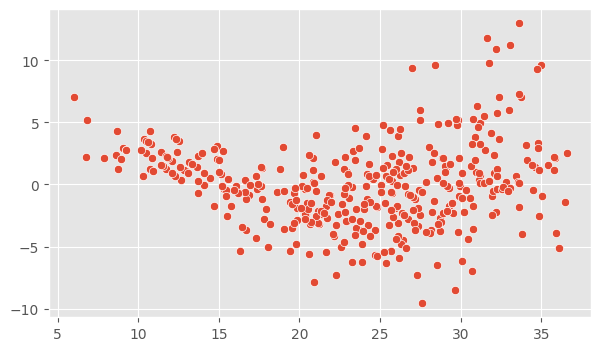

In [11]:
mlr_preds = mlr_res.predict(X_mlr)
mlr_resid = mpg - mlr_preds

sns.scatterplot(x=mlr_preds, y=mlr_resid)

We see that we still see a discernable pattern on the residuals, implying that there is still information unmodelled by the multiple linear regression model.

#### (e) Fit the linear regression with interaction effects.
#### (f) Try transformation of the variables

In [12]:
# We do e and f at the same time using polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly_trans = PolynomialFeatures(2)
auto_df_poly = poly_trans.fit_transform(X_mlr.iloc[:, 1:])

auto_df_poly = pd.DataFrame(auto_df_poly, columns=poly_trans.get_feature_names_out())

poly_reg = sm.OLS(mpg, auto_df_poly)
poly_model = poly_reg.fit()

print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     87.92
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          1.48e-154
Time:                        15:06:53   Log-Likelihood:                -932.23
No. Observations:                 397   AIC:                             1936.
Df Residuals:                     361   BIC:                             2080.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
1                     

   We see that the significant regressors are the **displacement, acceleration, year, origin, displacement x year, horsepower x weight, weight x year, acceleration x year, acceleration x origin, year ^ 2, year x origin**

In [13]:
auto_df_poly2 = auto_df_poly[["1", "year", "origin", "horsepower", "weight", "acceleration", "horsepower weight",
                             "acceleration year", "acceleration origin", "year^2"]]
auto_df_poly2

,1,year,origin,horsepower,weight,acceleration,horsepower weight,acceleration year,acceleration origin,year^2
0,1.0,70.0,1.0,130.0,3504.0,12.0,455520.0,840.0,12.0,4900.0
1,1.0,70.0,1.0,165.0,3693.0,11.5,609345.0,805.0,11.5,4900.0
2,1.0,70.0,1.0,150.0,3436.0,11.0,515400.0,770.0,11.0,4900.0
3,1.0,70.0,1.0,150.0,3433.0,12.0,514950.0,840.0,12.0,4900.0
4,1.0,70.0,1.0,140.0,3449.0,10.5,482860.0,735.0,10.5,4900.0
...,...,...,...,...,...,...,...,...,...,...
392,1.0,82.0,1.0,86.0,2790.0,15.6,239940.0,1279.2,15.6,6724.0
393,1.0,82.0,2.0,52.0,2130.0,24.6,110760.0,2017.2,49.2,6724.0
394,1.0,82.0,1.0,84.0,2295.0,11.6,192780.0,951.2,11.6,6724.0
395,1.0,82.0,1.0,79.0,2625.0,18.6,207375.0,1525.2,18.6,6724.0


In [14]:

poly_reg2 = sm.OLS(mpg, auto_df_poly2)
poly_model2 = poly_reg2.fit()

print(poly_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     311.2
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          3.68e-171
Time:                        15:06:53   Log-Likelihood:                -961.07
No. Observations:                 397   AIC:                             1942.
Df Residuals:                     387   BIC:                             1982.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
1                     369.5404    

<AxesSubplot: >

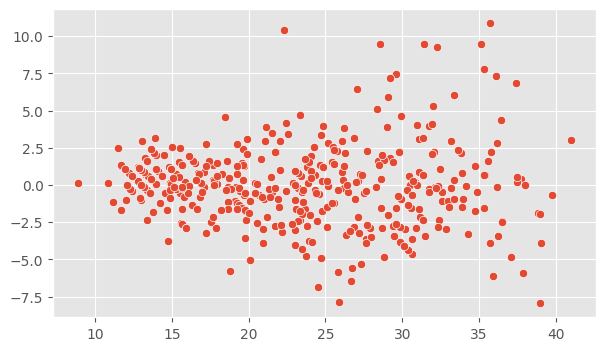

In [15]:
fig = plt.figure()

poly_reg2_preds = poly_model2.predict(auto_df_poly2)
poly_reg2_resids = mpg - poly_reg2_preds
ax = fig.add_subplot(111)
sns.scatterplot(x=poly_reg2_preds, y=poly_reg2_resids)

We see that the residuals look a lot better compared to the previous plots, but still we see an increase in the magnitude of the errors on as the fitted mpg gets larger, so we see a hint of heteroscedasticity in the residuals.

### 10. This question should be answered using the Carseats data set.

In [16]:
seats_df = pd.read_csv("data/Carseats.csv")

seats_df["Urban"] = seats_df["Urban"].map({"Yes": 1, "No": 0})
seats_df["US"] = seats_df["US"].map({"Yes": 1, "No": 0})

seats_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [17]:
seats_df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [18]:
sales = seats_df["Sales"]
X_sales = seats_df[["Price", "Urban", "US"]]
X_sales = sm.add_constant(X_sales)

carseats_model = sm.OLS(sales, X_sales)
carseats_fit = carseats_model.fit()
carseats_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        15:06:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (b) Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative.
 * Price - Holding other variables constant, an increase in price of 100 units yields a decrease in sales by 5.45 units.
 * Urban - Holding other variables constant, sales in the urban areas is lower than non-urban areas by 0.0219
 * US - Holding other constant, sales in the US is higher by 1.2 units compared to non-US areas.
 
### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.


$sales= 13.0435 - 0.0545Price - 0.0219Urban + 1.2{US}$

### (d) For which of the predictors can you reject the null hypothesis $H_0:{\beta}_j=0$ ?
* We see from the summary that the price and US predictors are statistically significant, enabling us to reject $H_0$


### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [19]:
carseats_model2 = sm.OLS(sales, X_sales[["const", "US", "Price"]])
carseats_fit2 = carseats_model2.fit()

carseats_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        15:06:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
US             1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) How well do the models in (a) and (e) fit the data?

MSE Model 1:  6.052086678521181
MSE Model 2:  6.052186154497146


<AxesSubplot: >

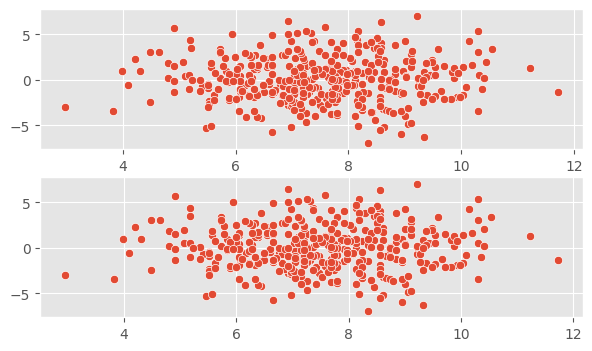

In [20]:
from sklearn.metrics import mean_squared_error as mse

carseats_pred1 = carseats_fit.predict(X_sales)
carseats_pred2 = carseats_fit2.predict(X_sales[["const", "US", "Price"]])

seats_resids1 = sales - carseats_pred1
seats_resids2 = sales - carseats_pred2
print("MSE Model 1: ", mse(sales, carseats_pred1))
print("MSE Model 2: ", mse(sales, carseats_pred2))
fig = plt.figure()

fig.add_subplot(211)
sns.scatterplot(x=carseats_pred1, y=seats_resids1)


fig.add_subplot(212)
sns.scatterplot(x=carseats_pred2, y=seats_resids2)


We see that their residual plots looks the same and that the in-sample MSE is the same at around 6.05. This means that they have the same performance but model 2 has an advantage in a sense that it is a simpler model since it has one fewer predictor.

### (g) Using the model from (e), obtain 95% confidence intrvals for the coefficienrts

In [21]:
carseats_fit2.conf_int()

,0,1
const,11.79032,14.271265
US,0.69152,1.707766
Price,-0.06476,-0.044195


### 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

$> set.seed(1)$<br>
$> x <-rnorm(100)$<br>
$> y <-2 * x + rnorm(100)$

In [22]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

<AxesSubplot: >

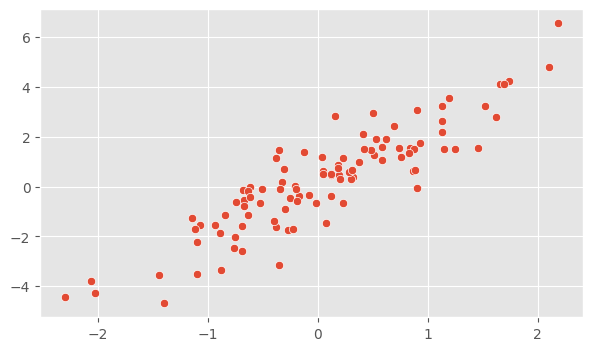

In [23]:
sns.scatterplot(x=x, y=y)

#### (a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results.

In [24]:
lm_model11 = sm.OLS(y, x).fit()
lm_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    3.46e-36
Time:                        15:06:54   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that  that the predictor is highly significant, thus the hyphothesis $H_0: \beta = 0$ is rejected

#### (b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [25]:
lm_model11b = sm.OLS(x, y).fit()
lm_model11b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    3.46e-36
Time:                        15:06:54   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see, again, that the coefficient is highly significant.

#### (c) What is the relationship between the results obtained in (a) and (b)?
* The coefficients are roughly the reciprocal of each other with $ \beta_1 \approx 2$ and $\beta_2 \approx {1/\beta_1}\approx{0.38}$, they are not exactly equal due to the errors that we've added in teh construction of x and y.


#### (d) Todo
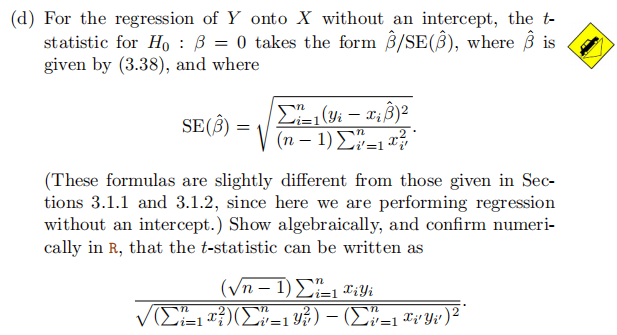

#### (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.
* We see from d that the equation is symmetrical for x and y, so we know that the t-statistic for the regression x onto y is the same both ways.

#### (f) In R, show that when regression is performed with an intercept,the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [26]:
x_c = sm.add_constant(x)
lm_model11f = sm.OLS(y, x_c).fit()
lm_model11f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           5.39e-36
Time:                        15:06:54   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_c = sm.add_constant(y)
lm_model11f2 = sm.OLS(x, y_c).fit()
lm_model11f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           5.39e-36
Time:                        15:06:54   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279      -0.124       0.036
x1             0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that when regressing y from x and x from y, the value of the t-statistic is unchanged. Although we see that the t-statistic of the constant changes.

### 12. This problem involves simple linear regression without an intercept

#### (a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?


$$
eq. 3.38 \rightarrow\hat\beta = \left(\sum_{i=1}^{n}x_iy_i\right)/\left(\sum_{i_1'=1}^nx_{i'}^2\right)
$$ 
$$
\hat\beta' = \left(\sum_{i=1}^{n}x_iy_i\right)/\left(\sum_{i_1'=1}^ny_{i'}^2\right)
$$ 
$$
\hat\beta = \hat\beta'
$$ 
$$
\left(\sum_{i_1'=1}^nx_{i'}^2\right) = \left(\sum_{i_1'=1}^ny_{i'}^2\right)
$$ 
We see the condition where the coefficient estimate will be equal in the result above. They are equal when the slope is 1.

#### (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [28]:
np.random.seed(1)
x_12b = np.random.randn(100)
y_12b = 1 - 3 * x_12b + np.random.randn(100)

lm_12b1 = sm.OLS(y_12b, x_12b).fit()
lm_12b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              284.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    6.95e-31
Time:                        15:06:54   Log-Likelihood:                         -180.65
No. Observations:                 100   AIC:                                      363.3
Df Residuals:                      99   BIC:                                      365.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.8163      0.167    -16.873      0.000      -3.147      -2.485
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.507
Skew:                          -0.172   Prob(JB):                        0.776
Kurtosis:                       3.059   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lm_12b2 = sm.OLS(x_12b, y_12b).fit()
lm_12b2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              284.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    6.95e-31
Time:                        15:06:54   Log-Likelihood:                         -62.190
No. Observations:                 100   AIC:                                      126.4
Df Residuals:                      99   BIC:                                      129.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2635      0.016    -16.873      0.000      -0.294      -0.232
==============================================================================
Omnibus:                        1.129   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.628
Skew:                          -0.043   Prob(JB):                        0.731
Kurtosis:                       3.379   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [30]:
x_12 = np.random.randn(100)
y_12 = x_12

lm_12c1 = sm.OLS(x ,y).fit()
lm_12c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    3.46e-36
Time:                        15:06:54   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm_12c2 = sm.OLS(y, x).fit()
lm_12c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                    3.46e-36
Time:                        15:06:54   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. 

#### (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [32]:
np.random.seed(1)
x_13a = np.random.randn(100)

#### (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [33]:
np.random.seed(2)
eps = np.random.randn(100) * 0.5

#### (c) Using x and eps, generate a vector y according to the model
$$
Y = -1 + 0.5X +\epsilon
$$
#### What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [34]:
Y = -1 + 0.5 * x_13a + eps

The length of the vector Y is 100. $\beta_0$ is -1 and $\beta_1$ is 0.5 in this linear model.

#### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

<AxesSubplot: >

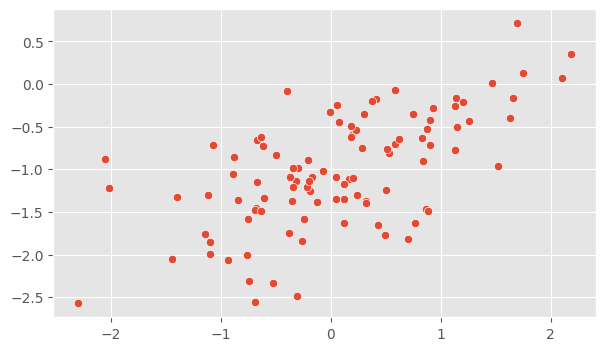

In [35]:
sns.scatterplot(x=x_13a, y=Y)

We see a roughly linear trend.

#### (e) Fit a least squares linear model to predict y using x. Commenton the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [36]:
X_13d = sm.add_constant(x_13a)
lm_13d = sm.OLS(Y, X_13d).fit()
print(lm_13d.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     60.60
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           7.29e-12
Time:                        15:06:54   Log-Likelihood:                -75.977
No. Observations:                 100   AIC:                             156.0
Df Residuals:                      98   BIC:                             161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0494      0.052    -20.037      0.0

The results show that the $\hat\beta_0=-1.094$ and $\hat\beta_1=0.46$, which is near their actual values.

#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.

<AxesSubplot: >

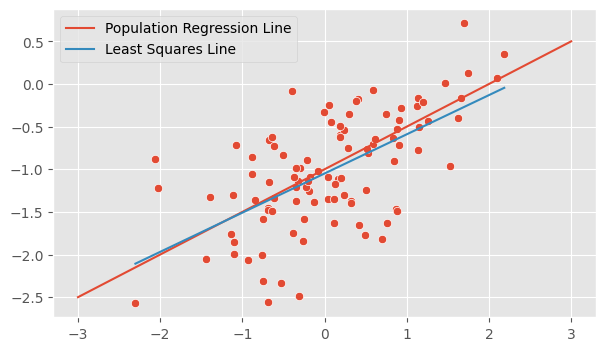

In [37]:
y_ = lambda x: -1 + 0.5 * x 

preds = lm_13d.predict()
sns.scatterplot(x=x_13a, y=Y)
sns.lineplot(x=[-3, 3], y=[y_(-3), y_(3)], label="Population Regression Line")
sns.lineplot(x=x_13a, y=preds, label="Least Squares Line")

#### (h) Now fit a polynomial regression model that predicts y using **$x$** and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [38]:
X_13g = pd.DataFrame(X_13d, columns=["const", "x"])
X_13g["x^2"] = X_13g.x ** 2

lm_13g = sm.OLS(Y, X_13g).fit()
print(lm_13g.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     32.54
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.54e-11
Time:                        15:06:54   Log-Likelihood:                -74.378
No. Observations:                 100   AIC:                             154.8
Df Residuals:                      97   BIC:                             162.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1140      0.063    -17.594      0.0

Based on the F-statistic, Log-likelihood, AIC, and BIC, the model without the x^2 term is better. But we would assume that the model with x^2 would have lower average error on the training set, in short, it would improve the fit on the training set.

#### (g) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     210.1
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           4.06e-26
Time:                        15:06:54   Log-Likelihood:                -22.684
No. Observations:                 100   AIC:                             49.37
Df Residuals:                      98   BIC:                             54.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9804      0.031    -31.761      0.0

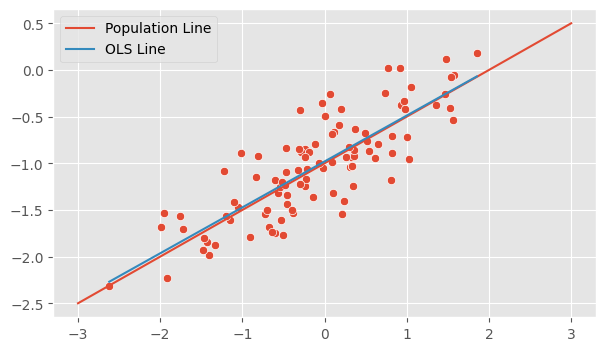

In [39]:
def build_diag_plot(X=None, y=None, var=0.25, seed1=42, seed2=43):
    if X is None:
        rnd = np.random.default_rng(seed1)
        np.random.seed(seed1)
        X = np.random.randn(100)
        np.random.seed(seed2)
        eps = np.random.randn(100) * var ** 0.5
        
        y = -1 + 0.5*X + eps
        X_ = sm.add_constant(X)
    
    model = sm.OLS(y, X_).fit()
    print(model.summary())
    
    y_lambda = lambda x_: -1 + 0.5 * x_
    
    preds = model.predict()
    
    sns.scatterplot(x=X, y=y)
    sns.lineplot(x=[-3, 3], y=[y_lambda(-3), y_lambda(3)], label="Population Line")
    sns.lineplot(x=X, y=preds, label="OLS Line")


build_diag_plot(var=0.1)
            

As expected, reducing the variacne of the error term leads to the estimated coefficient to be nearer their actual values.

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.45
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.39e-06
Time:                        15:06:55   Log-Likelihood:                -123.43
No. Observations:                 100   AIC:                             250.9
Df Residuals:                      98   BIC:                             256.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9464      0.085    -11.195      0.0

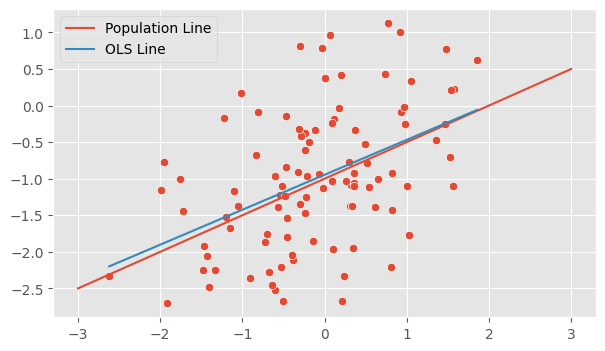

In [40]:
build_diag_plot(var=0.75)

We see that in the noiser data that the coefficients are further from their actual values. We also see in the noiser data that it trusts the regressors less as seen in the reduction of the F-statistic and t-statistic.

#### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

#### Baseline
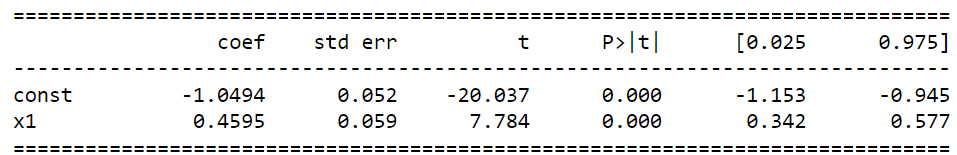
#### Less Noisy
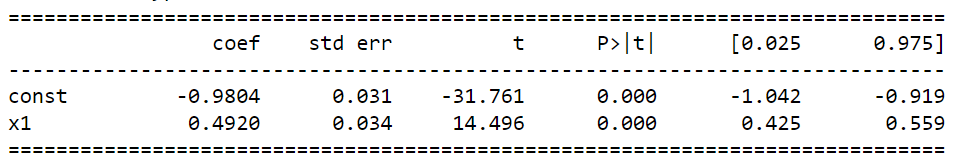
#### More Noisy
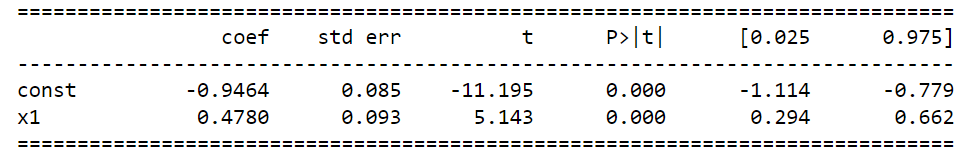

We see that the confidence intervals for the less noisy data are shorter, and the opposite is true for the more noisy data.

### 14. This problem focuses on the collinearity problem.

#### (a) Perform the following commands in R.
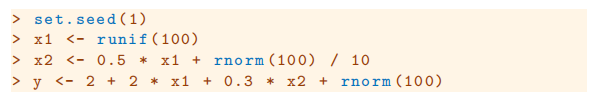
#### The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model  What are the regression coefficients?
$$
y = 2 + 2x_1 + 0.3x_2 + \epsilon
$$
$$
\beta_0=2
$$
$$
\beta_1=2
$$
$$
\beta_2=0.3
$$

#### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship of the variables.

In [41]:
np.random.seed(42)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.randn(100) / 10
y = 2 + 2*x1 + 0.3*x2 + np.random.randn(100)

,x1,x2
x1,1.000000,0.831431
x2,0.831431,1.000000


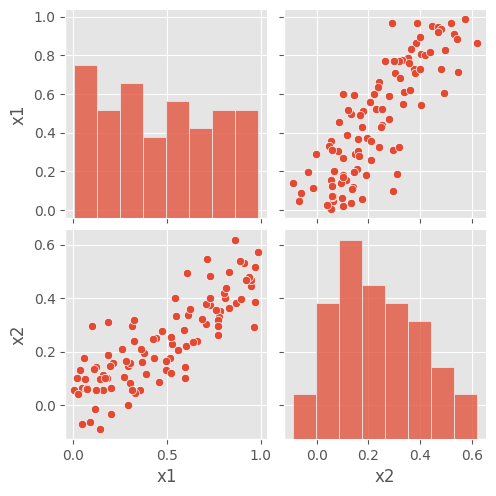

In [42]:
df_14 = pd.DataFrame([x1, x2]).T
df_14.columns = ["x1", "x2"]
display(df_14.corr())
df_14.corr()
sns.pairplot(df_14)

#### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [43]:
X_14 = sm.add_constant(df_14)
lm_14 = sm.OLS(y, X_14).fit()

lm_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.43
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           7.18e-07
Time:                        15:06:56   Log-Likelihood:                -150.66
No. Observations:                 100   AIC:                             307.3
Df Residuals:                      97   BIC:                             315.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0381      0.210      9.718      0.000       1.622       2.454
x1             2.1333      0.674      3.166      0.002       0.796       3.471
x2             0.0282      1.234      0.023      0.982      -2.421       2.478
==============================================================================
Omnibus:                        5.239   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.526
Skew:                           0.306   Prob(JB):                       0.0631
Kurtosis:                       3.975   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat\beta_0=2.04$, $\hat\beta_1=2.13$, $\hat\beta_2=0.0282$. We see that $\beta_1$ is overestimated whilst $\beta_2$ is underestimated. The t-statistics also show that we can reject $\hat\beta_0=\hat\beta_1=0$.

#### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [44]:
lm_14d = sm.OLS(y, X_14[["const", "x1"]]).fit()
lm_14d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.19
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           9.66e-08
Time:                        15:06:56   Log-Likelihood:                -150.66
No. Observations:                 100   AIC:                             305.3
Df Residuals:                      98   BIC:                             310.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0387      0.207      9.850      0.000       1.628       2.449
x1             2.1461      0.373      5.761      0.000       1.407       2.885
==============================================================================
Omnibus:                        5.220   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.492
Skew:                           0.306   Prob(JB):                       0.0642
Kurtosis:                       3.971   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can reject the $H_0: \beta_1=0$

#### (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [45]:
lm_14e = sm.OLS(y, X_14[["const", "x2"]]).fit()
lm_14e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     20.91
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.41e-05
Time:                        15:06:56   Log-Likelihood:                -155.57
No. Observations:                 100   AIC:                             315.1
Df Residuals:                      98   BIC:                             320.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2779      0.204     11.146      0.000       1.872       2.683
x2             3.2763      0.717      4.572      0.000       1.854       4.698
==============================================================================
Omnibus:                        8.745   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               11.550
Skew:                           0.423   Prob(JB):                      0.00310
Kurtosis:                       4.434   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can reject the $H_0: \beta_1=0$

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.
No, since x1 and x2 are linear combinations of each other plus some constant, which means that the information contained in them are redundant with each other.

#### (f) Now suppose we obtain one additional observation, which was unfortunately mismeasured.
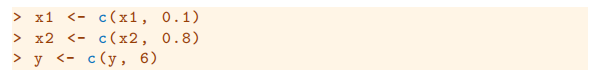

#### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [46]:
X_14g = pd.concat([X_14, pd.DataFrame([[1, 0.1, 0.8]], columns=["const", "x1", "x2"])])
y_14g = pd.Series(np.append(y, 6))
X_14g.index = y_14g.index

In [47]:
lm_14g1 = sm.OLS(y_14g, X_14g).fit()
lm_14g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     15.69
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.23e-06
Time:                        15:06:56   Log-Likelihood:                -155.02
No. Observations:                 101   AIC:                             316.0
Df Residuals:                      98   BIC:                             323.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0608      0.216      9.562      0.000       1.633       2.488
x1             1.1315      0.567      1.996      0.049       0.006       2.257
x2             2.0298      0.988      2.054      0.043       0.069       3.991
==============================================================================
Omnibus:                        6.027   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.826
Skew:                           0.326   Prob(JB):                       0.0329
Kurtosis:                       4.094   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lm_14g2 = sm.OLS(y_14g, X_14g[["const", "x1"]]).fit()
lm_14g2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     26.30
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.45e-06
Time:                        15:06:56   Log-Likelihood:                -157.15
No. Observations:                 101   AIC:                             318.3
Df Residuals:                      99   BIC:                             323.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1478      0.215     10.002      0.000       1.722       2.574
x1             1.9918      0.388      5.129      0.000       1.221       2.762
==============================================================================
Omnibus:                        9.549   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.390
Skew:                           0.518   Prob(JB):                      0.00336
Kurtosis:                       4.277   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm_14g3 = sm.OLS(y_14g, X_14g[["const", "x2"]]).fit()
lm_14g3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.59
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.29e-06
Time:                        15:06:56   Log-Likelihood:                -157.04
No. Observations:                 101   AIC:                             318.1
Df Residuals:                      99   BIC:                             323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2382      0.199     11.231      0.000       1.843       2.634
x2             3.4866      0.676      5.157      0.000       2.145       4.828
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               10.732
Skew:                           0.385   Prob(JB):                      0.00467
Kurtosis:                       4.399   Cond. No.                         6.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='x1'>

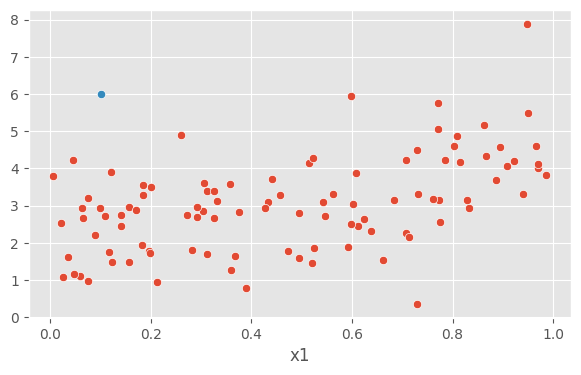

In [50]:
sns.scatterplot(x=X_14.x1, y=y)
sns.scatterplot(x=[0.1], y=[6])

The estimate for the first model is heavily altered, implying unstable conditions due to collinearity. The estimates for the 2nd and 3rd model are only moderately affected. The added point is an outlier as seen from the scatterplot above.

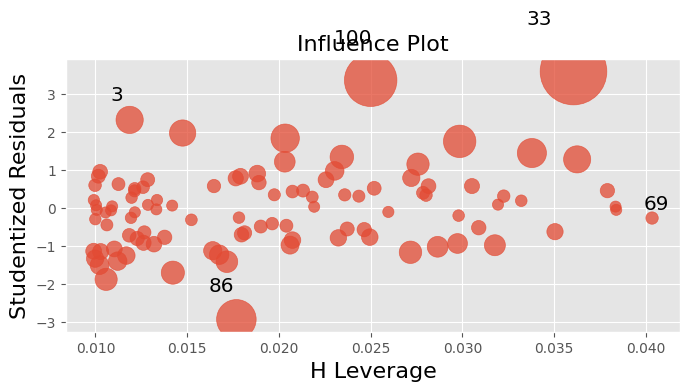

In [51]:
leverage = sm.graphics.influence_plot(lm_14g2)
plt.tight_layout()

We see from the leverage plot that the added observation also has high leverage.